Basic Information:

Number of rows: 1420
Number of columns: 10

Column Names and Data Types:
SER_REF            object
TIME_REF          float64
DATA_VAL            int64
STATUS             object
UNITS              object
Subject            object
Group              object
Series_title_1     object
Series_title_2     object
Series_title_3     object
dtype: object

Missing Values in Each Column:
SER_REF           0
TIME_REF          0
DATA_VAL          0
STATUS            0
UNITS             0
Subject           0
Group             0
Series_title_1    0
Series_title_2    0
Series_title_3    0
dtype: int64

Descriptive Statistics (Numerical Columns):
          TIME_REF     DATA_VAL
count  1420.000000  1420.000000
mean   2014.864092  1316.606338
std       4.887636   217.285987
min    2006.110000   969.000000
25%    2011.010000  1122.000000
50%    2015.040000  1281.000000
75%    2019.070000  1481.000000
max    2023.090000  1987.000000

Descriptive Statistics (Categorical Columns):
        

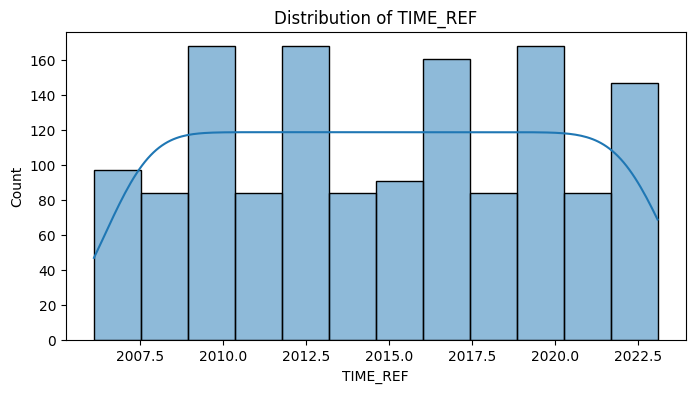

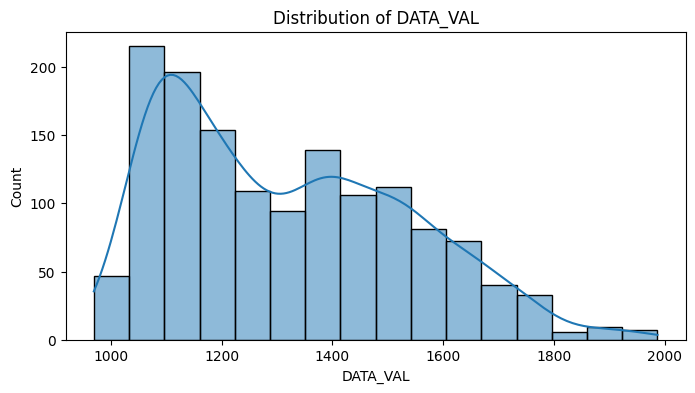

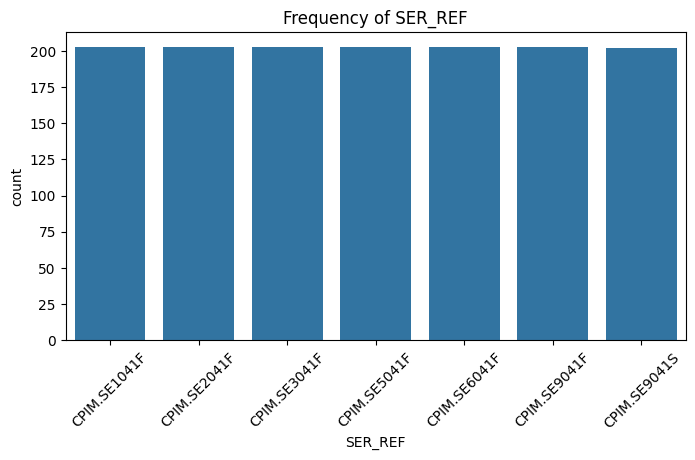

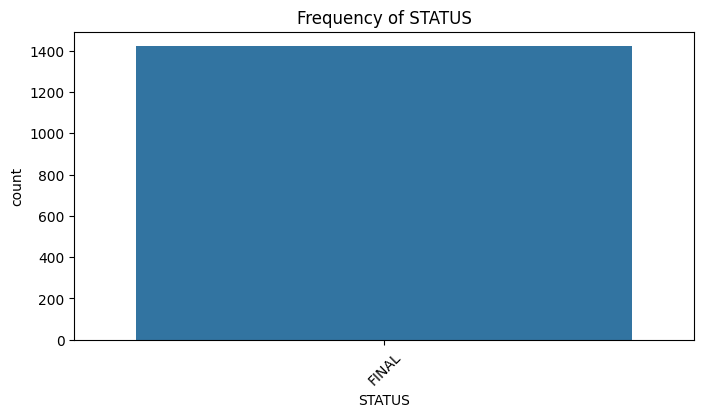

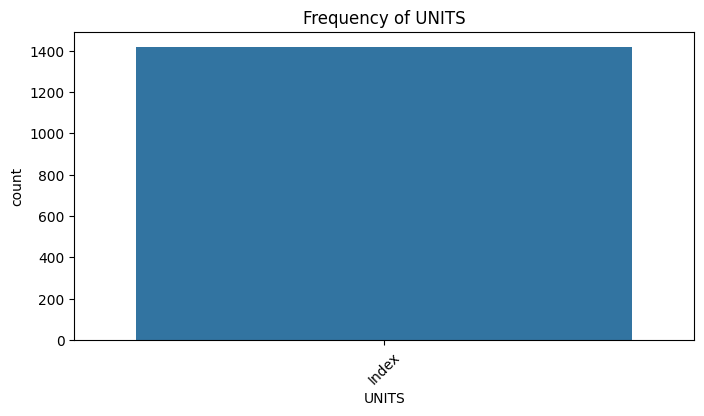

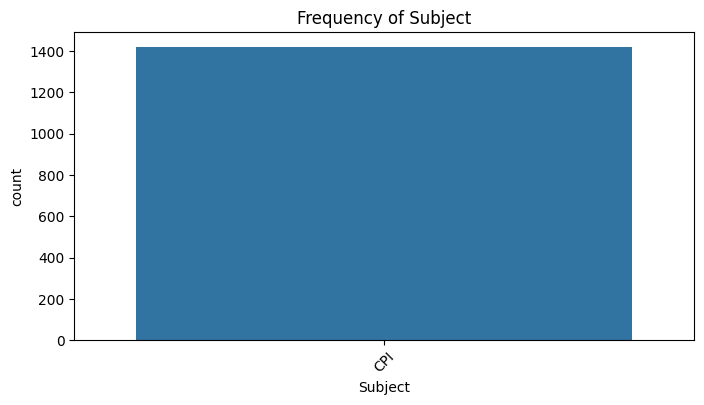

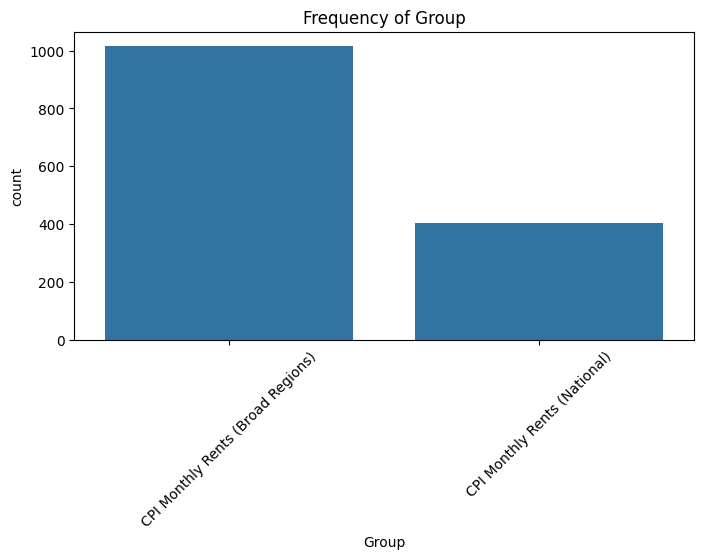

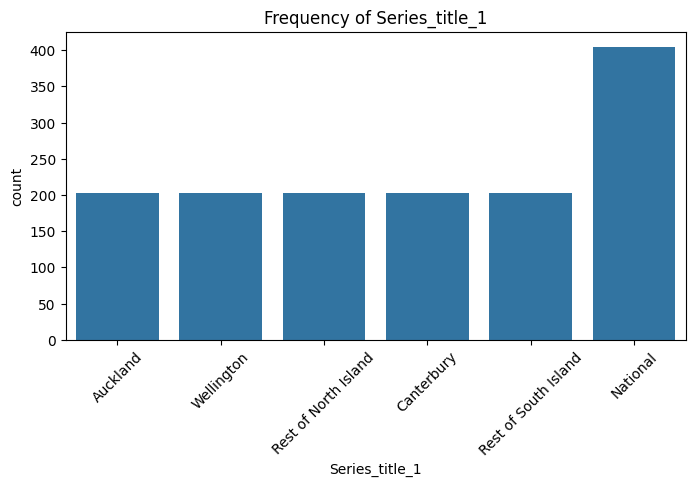

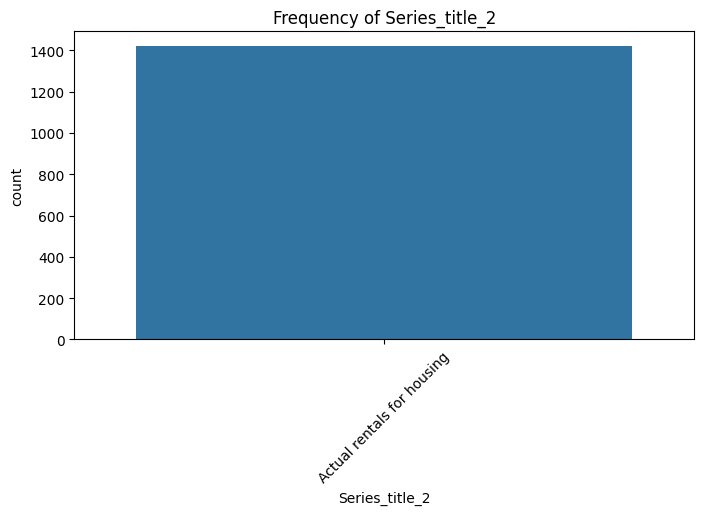

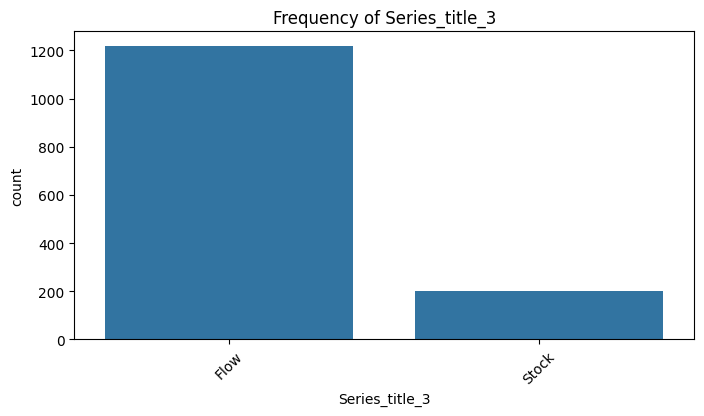


Correlation Matrix (Numerical Columns):
          TIME_REF  DATA_VAL
TIME_REF  1.000000  0.952783
DATA_VAL  0.952783  1.000000


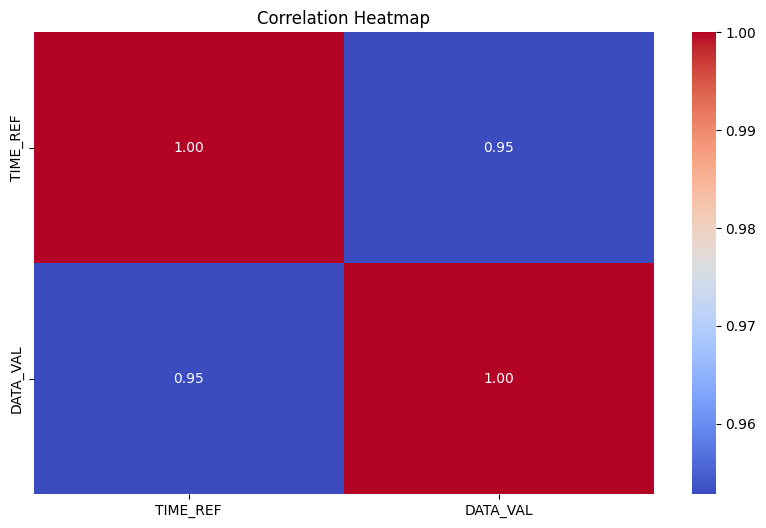

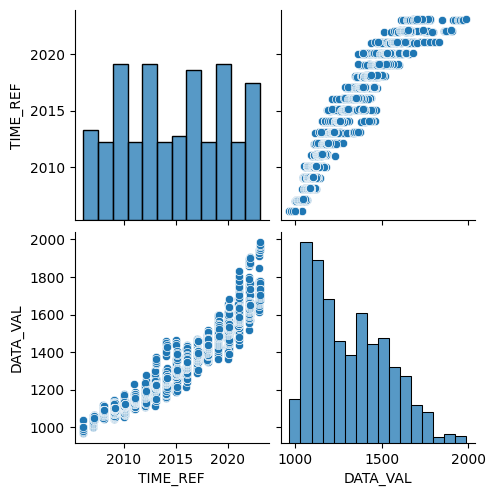

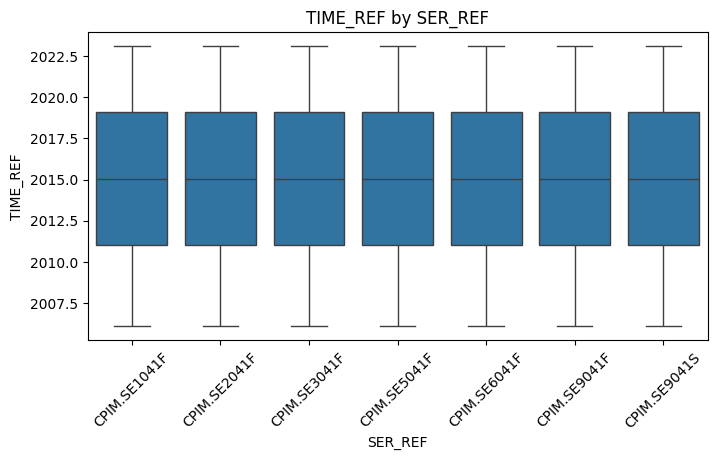

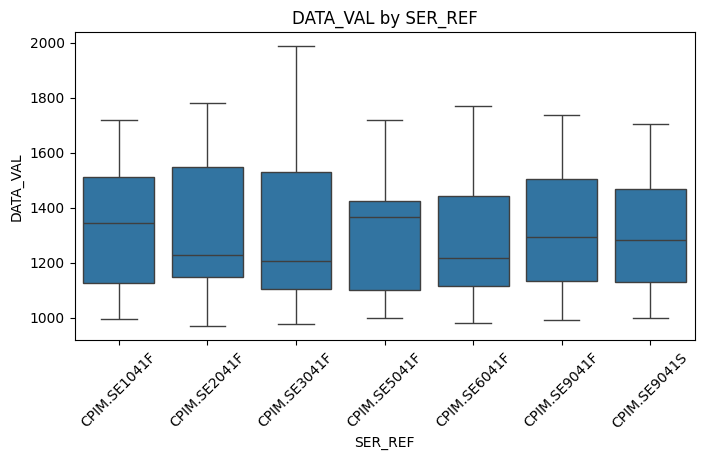

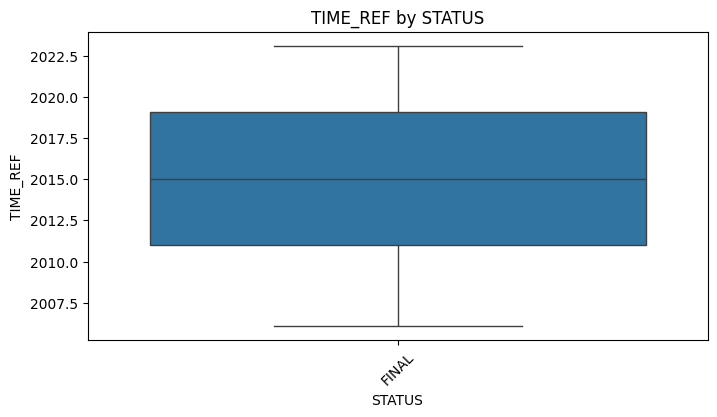

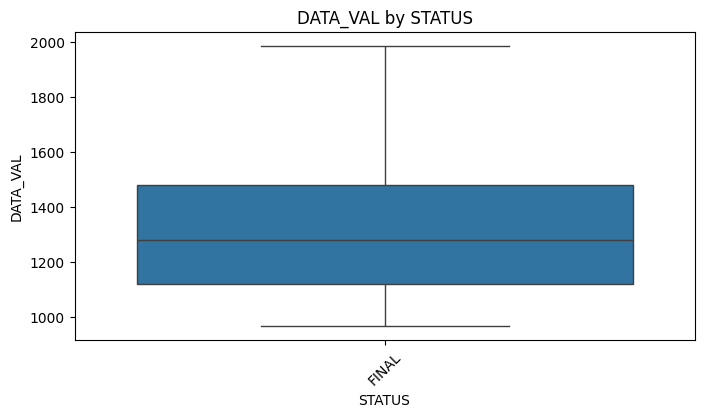

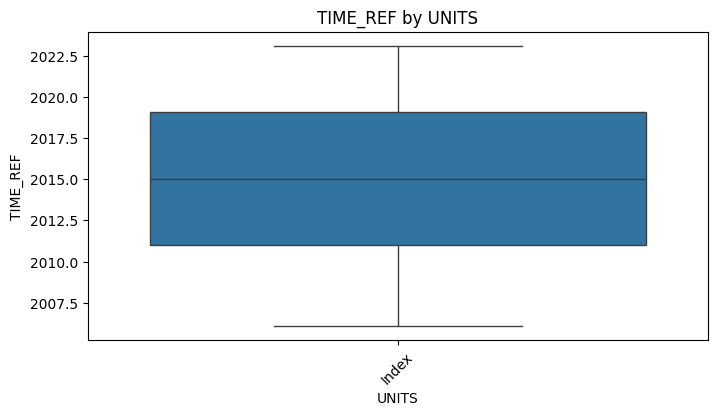

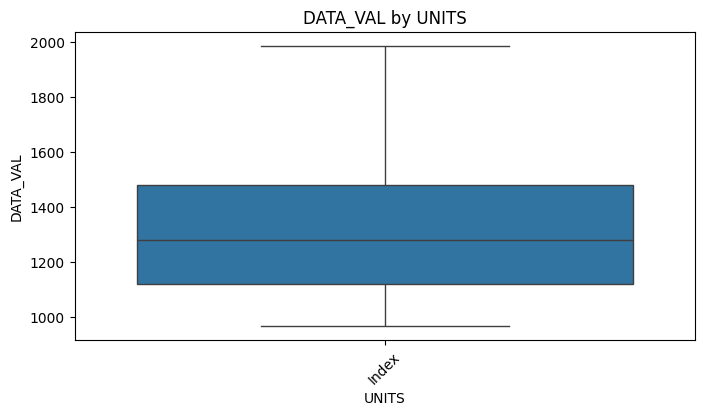

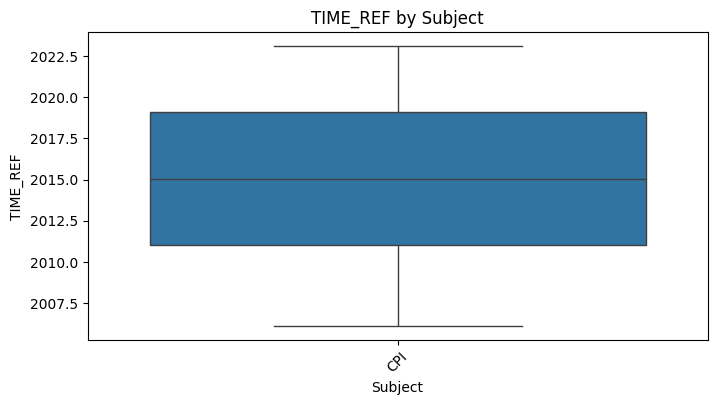

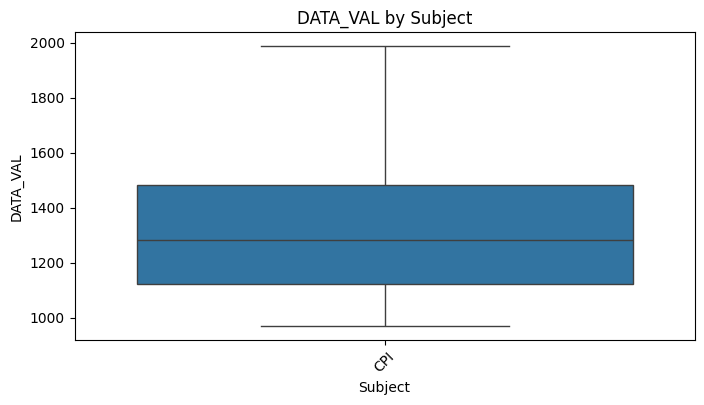

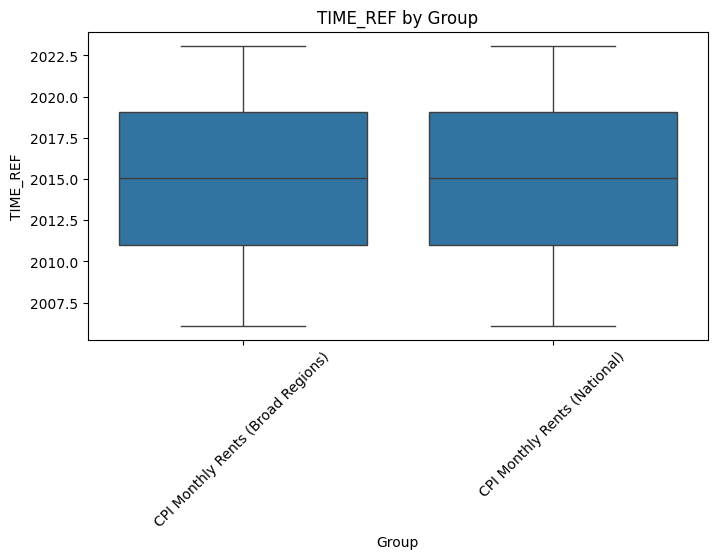

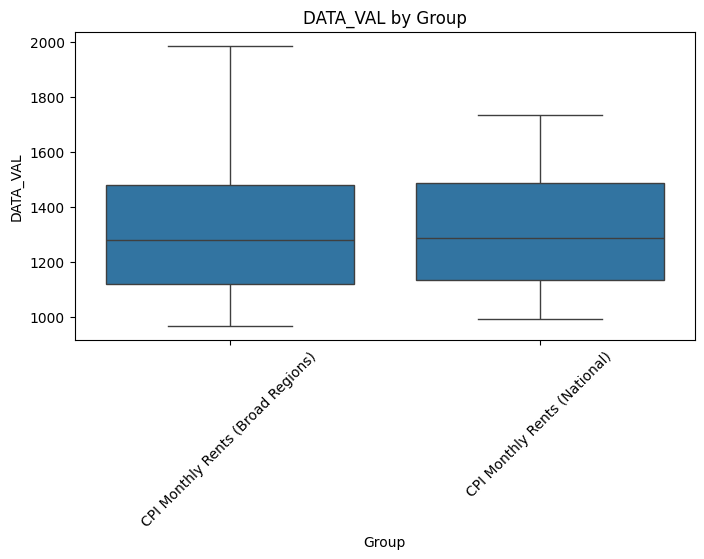

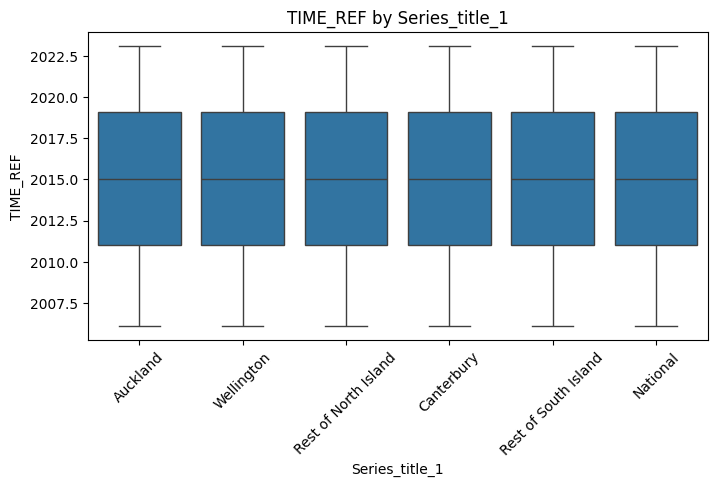

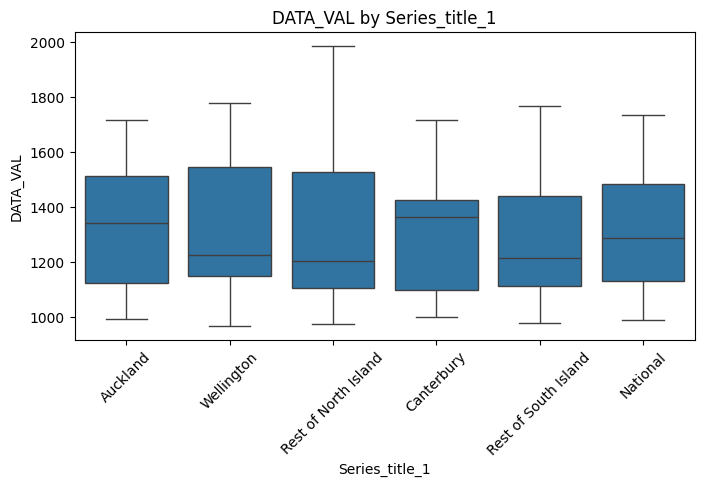

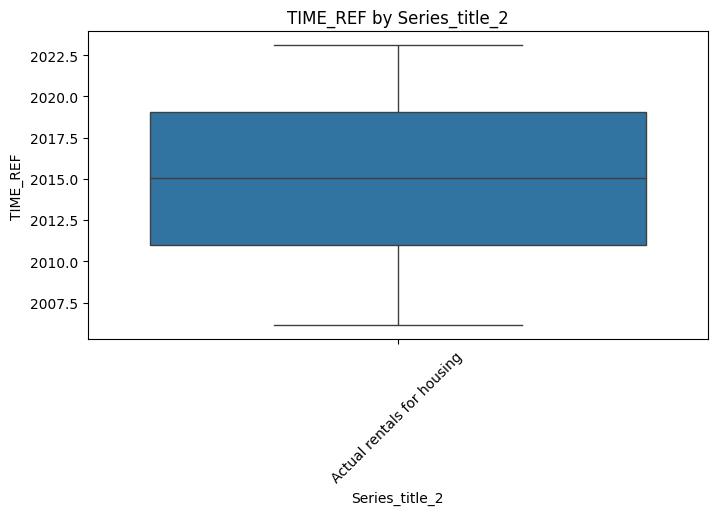

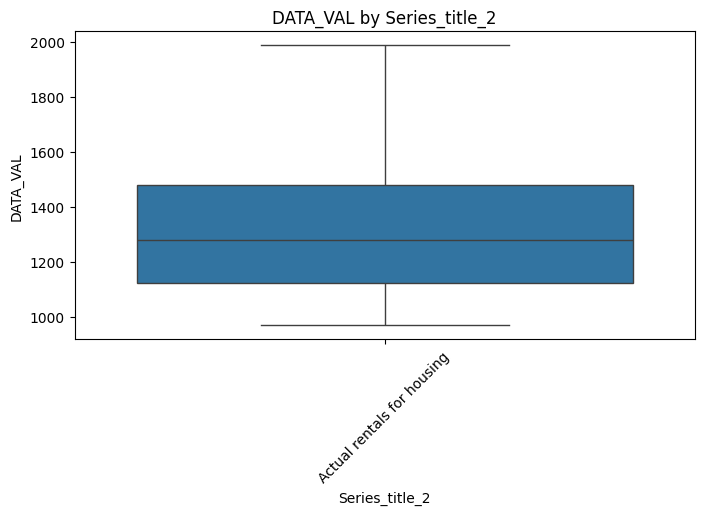

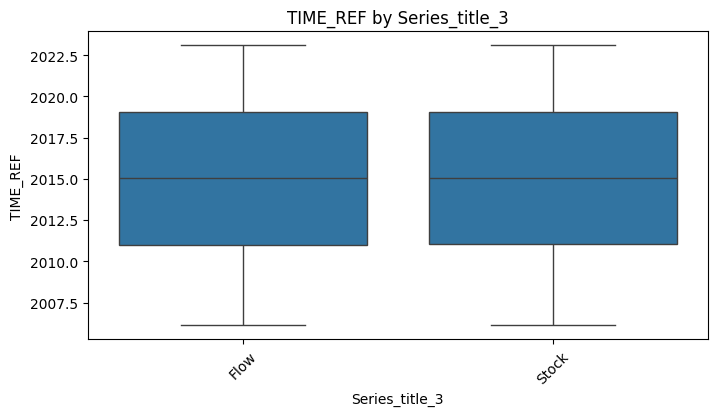

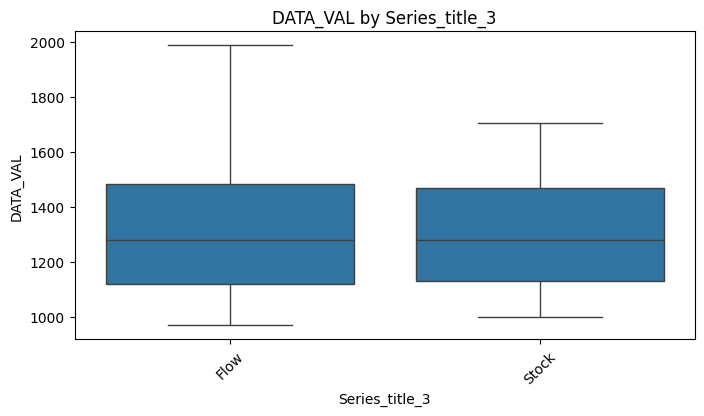


No missing values found in the dataset.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to load dataset
def load_dataset(file_path):
    return pd.read_csv('rental-september.csv')

# Function for basic data info
def basic_info(data):
    print("Basic Information:\n")

    # Display number of rows and columns
    print(f"Number of rows: {data.shape[0]}")
    print(f"Number of columns: {data.shape[1]}")

    # Column names and types
    print("\nColumn Names and Data Types:")
    print(data.dtypes)

    # Check for missing values
    print("\nMissing Values in Each Column:")
    print(data.isnull().sum())

# Function for univariate analysis
def univariate_analysis(data):
    print("\nDescriptive Statistics (Numerical Columns):")
    print(data.describe())

    print("\nDescriptive Statistics (Categorical Columns):")
    print(data.describe(include='object'))

    # Visualize distributions for numerical columns
    num_columns = data.select_dtypes(include=[np.number]).columns
    for col in num_columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(data[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.show()

    # Visualize frequency of categorical columns
    cat_columns = data.select_dtypes(include=['object']).columns
    for col in cat_columns:
        plt.figure(figsize=(8, 4))
        sns.countplot(x=col, data=data)
        plt.title(f'Frequency of {col}')
        plt.xticks(rotation=45)
        plt.show()

# Function for bivariate analysis
def bivariate_analysis(data):
    # Correlation matrix for numerical variables
    print("\nCorrelation Matrix (Numerical Columns):")
    corr_matrix = data.corr(numeric_only=True)
    print(corr_matrix)

    # Visualizing correlation matrix using heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.show()

    # Pairplot for numerical columns
    num_columns = data.select_dtypes(include=[np.number]).columns
    sns.pairplot(data[num_columns])
    plt.show()

    # Scatter plots between numerical and categorical variables
    cat_columns = data.select_dtypes(include=['object']).columns
    for col in cat_columns:
        for num_col in num_columns:
            plt.figure(figsize=(8, 4))
            sns.boxplot(x=col, y=num_col, data=data)
            plt.title(f'{num_col} by {col}')
            plt.xticks(rotation=45)
            plt.show()

# Function to handle missing values
def handle_missing_values(data):
    # Display missing values
    missing = data.isnull().sum()
    missing = missing[missing > 0]
    if len(missing) == 0:
        print("\nNo missing values found in the dataset.")
    else:
        print("\nColumns with Missing Values:")
        print(missing)

        # Filling missing values with median for numerical columns and mode for categorical columns
        for col in data.columns:
            if data[col].isnull().sum() > 0:
                if data[col].dtype == 'object':
                    data[col].fillna(data[col].mode()[0], inplace=True)
                else:
                    data[col].fillna(data[col].median(), inplace=True)
        print("Missing values have been filled.")

# Main function to perform EDA
def perform_eda(file_path):
    # Load the dataset
    data = load_dataset(file_path)

    # Step 1: Basic Info
    basic_info(data)

    # Step 2: Univariate Analysis
    univariate_analysis(data)

    # Step 3: Bivariate Analysis
    bivariate_analysis(data)

    # Step 4: Handling Missing Values
    handle_missing_values(data)

# Example usage
if __name__ == "__main__":
    file_path = 'your_dataset.csv'  # Replace with actual file path
    perform_eda(file_path)